# Screencast

In this Notebook I´ll answer the question of how the female and male income of developers have changed in the past 3 years.

In [1]:
# Importing necessary modules 

import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
def read_data(year,compensation_col):
    """Reads in and cleans dataframe from NaNs in the salary column of Stackoverflow Survey data

    Args:
    year: int., year of Stackoverflow Survey
    compensation_col: str., column name of converted salary or compensation
    
    Returns:
    dataframe
    """
    df=pd.read_csv('/Users/anna/stackoverflow/developer_survey_{}/survey_results_public.csv'.format(year))
    df.dropna(subset=[compensation_col])
    return df

In [3]:
def calc_medians(df,compensation_col):
    """Calculates median salary grouped by gender

    Args:
    df: dataframe, cleaned Stackoverflow survey data
    compensation_col: str., column name of converted salary or compensation
    gender_col: str., column name of the gender column
    
    Returns:
    median salary grouped by gender
    """
    median=df.groupby(['Gender'])[compensation_col].median()
    return median

After having defined the two functions, I´ll now read in the data from 2020,2019,2018 and 2017.


In [4]:
# Read in the survey data with the read_data function 
# and filter only male and female professional developers 

df_2020= read_data(2020,'ConvertedComp').query("MainBranch == 'I am a developer by profession' and (Gender=='Man' or Gender=='Woman')")

df_2019= read_data(2019,'ConvertedComp').query("MainBranch == 'I am a developer by profession' and (Gender=='Man' or Gender=='Woman')")

df_2018= read_data(2018,'ConvertedSalary').query("(Employment == 'Employed full-time' or Employment == 'Employed part-time') and (Gender=='Male' or Gender=='Female')")

df_2017= read_data(2017,'Salary').query("Professional == 'Professional developer' and (Gender=='Male' or Gender=='Female')")





/Users/anna/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
# Calculate medians of compensation for male and female developers

medians_2020 =calc_medians(df_2020,'ConvertedComp')
medians_2019 =calc_medians(df_2019,'ConvertedComp')

medians_2018=calc_medians(df_2018,'ConvertedSalary').rename({'Female': 'Woman', 'Male': 'Man'})
medians_2017=calc_medians(df_2017,'Salary').rename({'Female': 'Woman', 'Male': 'Man'})

        Woman           Man
2017  52500.0  50537.634409
2018  56358.5  58332.000000
2019  57287.0  57264.000000
2020  54116.0  54049.000000


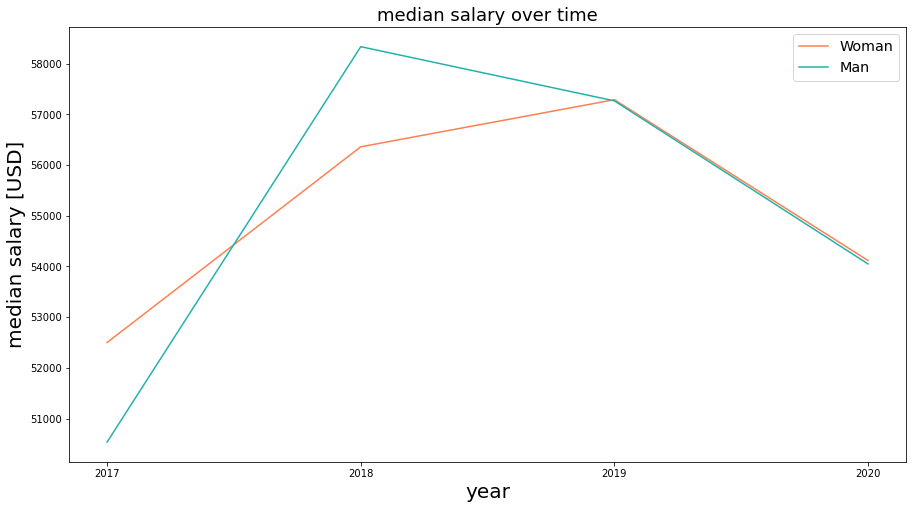

In [8]:
# create a dataframe containing the medians sorted by years and gender

df_medians = pd. concat([medians_2017.rename('2017'),medians_2018.rename('2018'),medians_2019.rename('2019'),medians_2020.rename('2020')], axis=1).transpose()
print(df_medians)

# plot the dataframe and customize colors
fig,ax=plt.subplots(figsize=[15,8])
ax.plot(df_medians.index,df_medians['Woman'], color='coral')
ax.plot(df_medians.index,df_medians['Man'], color='lightseagreen')

#set title and label axis
ax.set_title('median salary over time',size=18)
ax.set_xlabel('year',size=20)
ax.set_ylabel('median salary [USD]',size=20)

#add a legend
ax.legend(df_medians,fontsize='x-large')

#save figure for use in blogpost
plt.savefig("median salary over time.png")